# **CONDOMINIUM PRICE GRADIENT DESCENT**
### **NAME:** Edward Tan Yuan Chong
### **DATASET:** 2.Condo Tamp Pasir Ris H1 Price

## **IMPORT MODULES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
# Set seaborn style
sns.set(font='Century Gothic')
# Muted color palette
muted = sns.color_palette('muted')

c:\Users\edw4r\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **INTRODUCTION**

**IMPORT DATA**

In [3]:
# Import data
price = pd.read_excel('./2. Condo Tamp Paris Ris H1 price.xlsx')
price.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
0,DOUBLE BAY RESIDENCES,1723000,1270.15,1357,2023-06-01,SIMEI STREET 4,Resale,Strata,118,14602,-,Condominium,1,99 yrs lease commencing from 2008,18,Outside Central Region,11 to 15
1,EASTPOINT GREEN,1088888,968.76,1124,2023-06-01,SIMEI STREET 3,Resale,Strata,90,12099,-,Condominium,1,99 yrs lease commencing from 1996,18,Outside Central Region,01 to 05
2,EASTPOINT GREEN,1198000,1194.80,1003,2023-06-01,SIMEI STREET 3,Resale,Strata,111,10793,-,Condominium,1,99 yrs lease commencing from 1996,18,Outside Central Region,01 to 05
3,Q BAY RESIDENCES,1570000,1119.46,1402,2023-06-01,TAMPINES STREET 86,Resale,Strata,104,15096,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,11 to 15
4,VUE 8 RESIDENCE,1500000,1087.16,1380,2023-06-01,PASIR RIS HEIGHTS,Resale,Strata,101,14851,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,11 to 15


**UNDERSTANDING DATA**

In [4]:
price.shape

(307, 17)

In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Project Name          307 non-null    object        
 1   Transacted Price ($)  307 non-null    int64         
 2   Area (SQFT)           307 non-null    float64       
 3   Unit Price ($ PSF)    307 non-null    int64         
 4   Sale Date             307 non-null    datetime64[ns]
 5   Street Name           307 non-null    object        
 6   Type of Sale          307 non-null    object        
 7   Type of Area          307 non-null    object        
 8   Area (SQM)            307 non-null    int64         
 9   Unit Price ($ PSM)    307 non-null    int64         
 10  Nett Price($)         307 non-null    object        
 11  Property Type         307 non-null    object        
 12  Number of Units       307 non-null    int64         
 13  Tenure              

In [6]:
print("Number of duplicated rows: " + str(price.duplicated().sum()))

Number of duplicated rows: 0


In [7]:
# Check for missing values
print("Number of missing values:\n" + str(price.isnull().sum()))

Number of missing values:
Project Name            0
Transacted Price ($)    0
Area (SQFT)             0
Unit Price ($ PSF)      0
Sale Date               0
Street Name             0
Type of Sale            0
Type of Area            0
Area (SQM)              0
Unit Price ($ PSM)      0
Nett Price($)           0
Property Type           0
Number of Units         0
Tenure                  0
Postal District         0
Market Segment          0
Floor Level             0
dtype: int64


Last two unnamed columns were redundant text, hence we will drop those columns.

In [8]:
try:
    price = price.drop(columns=["Unnamed: 17","Unnamed: 18"])
except:
    print("Columns already removed.")
price

Columns already removed.


,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
0,DOUBLE BAY RESIDENCES,1723000,1270.15,1357,2023-06-01,SIMEI STREET 4,Resale,Strata,118,14602,-,Condominium,1,99 yrs lease commencing from 2008,18,Outside Central Region,11 to 15
1,EASTPOINT GREEN,1088888,968.76,1124,2023-06-01,SIMEI STREET 3,Resale,Strata,90,12099,-,Condominium,1,99 yrs lease commencing from 1996,18,Outside Central Region,01 to 05
2,EASTPOINT GREEN,1198000,1194.80,1003,2023-06-01,SIMEI STREET 3,Resale,Strata,111,10793,-,Condominium,1,99 yrs lease commencing from 1996,18,Outside Central Region,01 to 05
3,Q BAY RESIDENCES,1570000,1119.46,1402,2023-06-01,TAMPINES STREET 86,Resale,Strata,104,15096,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,11 to 15
4,VUE 8 RESIDENCE,1500000,1087.16,1380,2023-06-01,PASIR RIS HEIGHTS,Resale,Strata,101,14851,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,11 to 15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,MODENA,1541888,1496.20,1031,2023-01-01,SIMEI STREET 4,Resale,Strata,139,11093,-,Condominium,1,99 yrs lease commencing from 1997,18,Outside Central Region,01 to 05
303,THE TROPICA,1420000,1237.86,1147,2023-01-01,TAMPINES AVENUE 1,Resale,Strata,115,12348,-,Condominium,1,99 yrs lease commencing from 1996,18,Outside Central Region,06 to 10
304,THE ALPS RESIDENCES,950000,699.66,1358,2023-01-01,TAMPINES STREET 86,Resale,Strata,65,14615,-,Condominium,1,99 yrs lease commencing from 2015,18,Outside Central Region,11 to 15
305,SEASTRAND,683000,570.49,1197,2023-01-01,PASIR RIS LINK,Resale,Strata,53,12887,-,Condominium,1,99 yrs lease commencing from 2011,18,Outside Central Region,06 to 10


In [9]:
print("Distinct values for Market Segment Column: " + str(price['Market Segment'].unique()))
print("Distinct values for Number of Units Column: " + str(price['Number of Units'].unique()))
print("Distinct values for Property Type Column: " + str(price['Property Type'].unique()))
print("Distinct values for Type of Sale Column: " + str(price['Type of Sale'].unique()))
print("Distinct values for Type of Area Column: " + str(price['Type of Area'].unique()))
print("Distinct values for Postal District Column: " + str(price['Postal District'].unique()))

Distinct values for Market Segment Column: ['Outside Central Region']
Distinct values for Number of Units Column: [1]
Distinct values for Property Type Column: ['Condominium']
Distinct values for Type of Sale Column: ['Resale']
Distinct values for Type of Area Column: ['Strata']
Distinct values for Postal District Column: [18]


We can see that all these columns only have 1 distinct values and would prove to not be useful as an additional predictor for our model 3 MLR. 

**EXPLORATORY DATA ANALYSIS [EDA]**

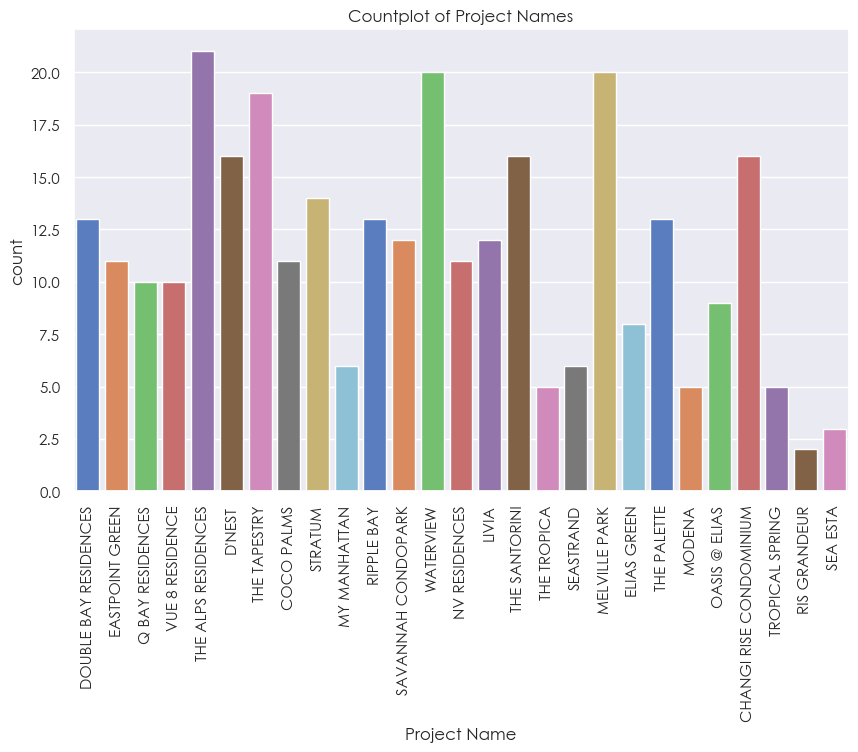

In [10]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=price,x='Project Name',ax=ax,palette='muted').set(title='Countplot of Project Names')
plt.xticks(rotation=90)
plt.show()

We can see that there are many different projects in this dataset, and the most prominent project would be named "The Alps Residences", whilst the least prominent project would be named "Ris Grandeur".

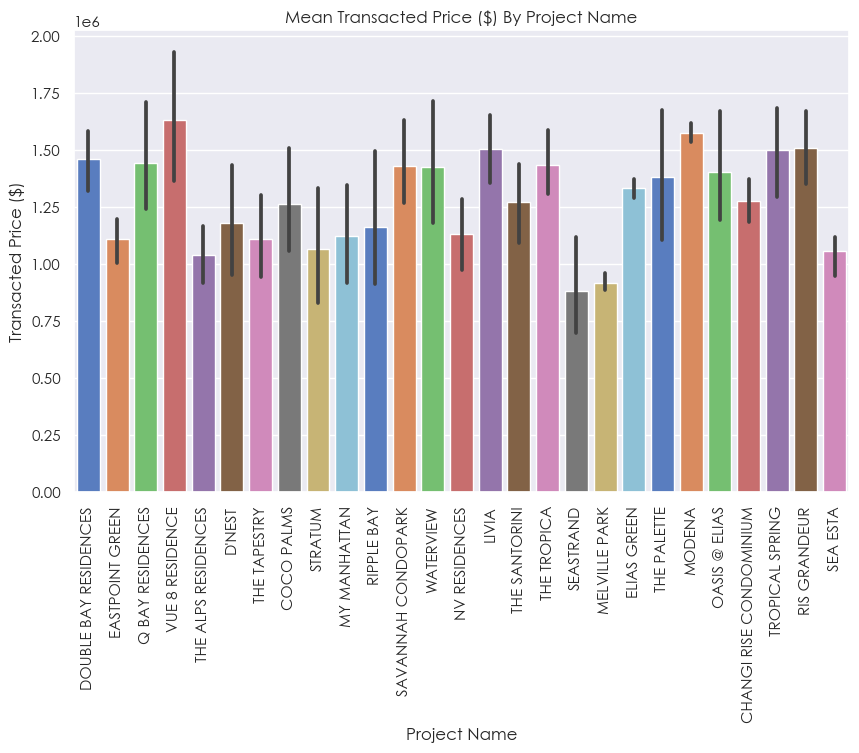

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=price,x='Project Name',y="Transacted Price ($)",ax=ax,palette='muted').set(title='Mean Transacted Price ($) By Project Name')
plt.xticks(rotation=90)
plt.show()

We can see the average transacted price of each project, and the project that has the highest mean transacted price would be "Vue 8 Residences", whilst the project with the lowest mean transacted price would be "Seastrand".

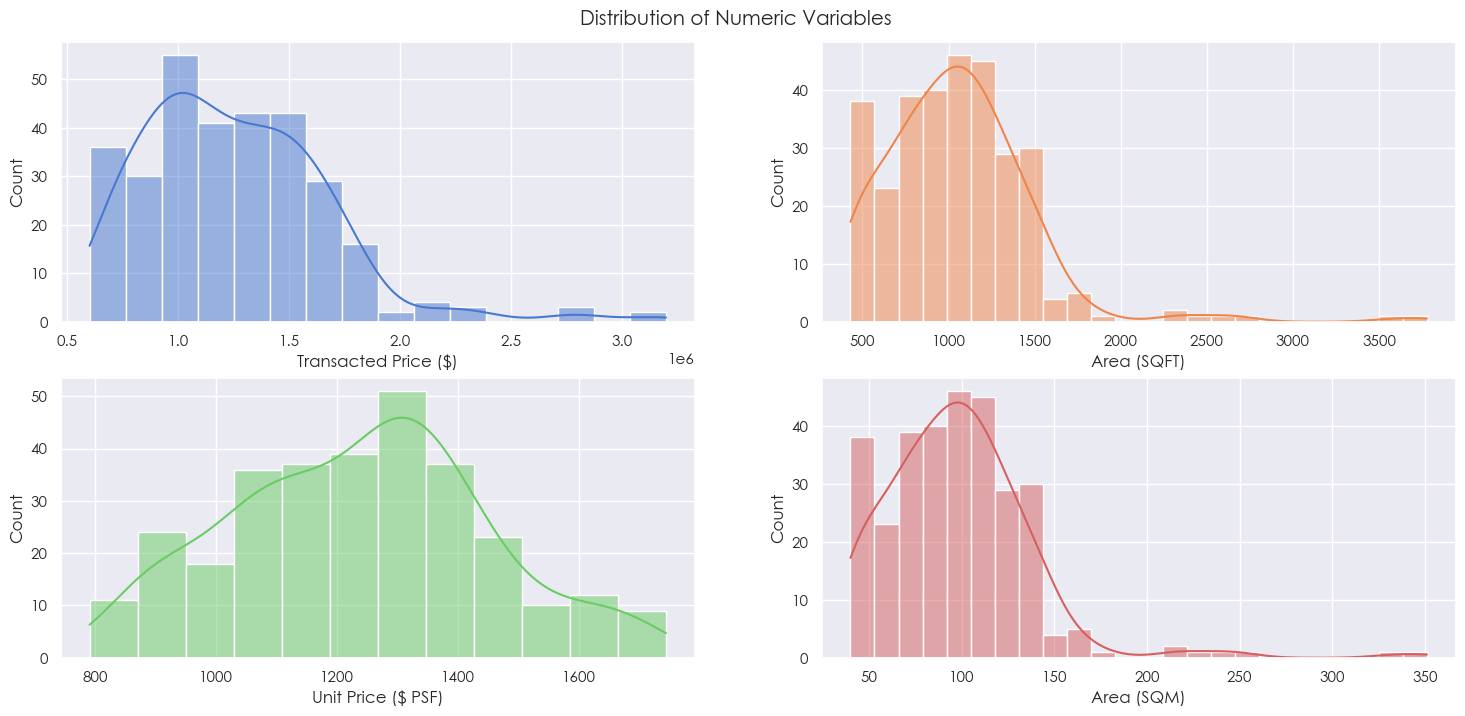

In [12]:
fig,ax = plt.subplots(2,2,figsize=(18,8))
sns.histplot(data=price,x='Transacted Price ($)',kde=True,ax=ax[0][0],color=muted[0])
sns.histplot(data=price,x='Area (SQFT)',kde=True,ax=ax[0][1],color=muted[1])
sns.histplot(data=price,x='Unit Price ($ PSF)',kde=True,ax=ax[1][0],color=muted[2])
sns.histplot(data=price,x='Area (SQM)',kde=True,ax=ax[1][1],color=muted[3])
fig.suptitle(t="Distribution of Numeric Variables",y=0.92)
plt.show()

We can see that generally, most numeric variables in the dataset are left-skewed.

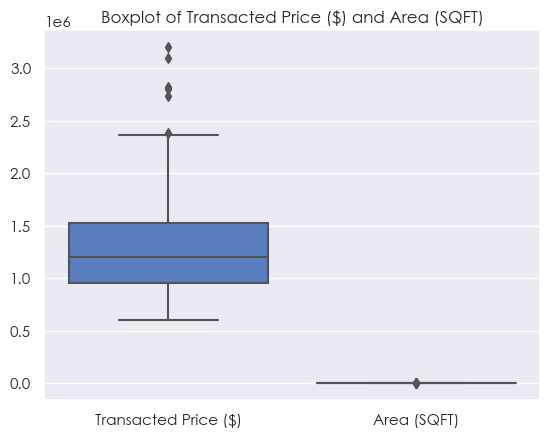

In [13]:
sns.boxplot(price.loc[:,['Transacted Price ($)','Area (SQFT)']],palette=muted).set(title='Boxplot of Transacted Price ($) and Area (SQFT)')
plt.show()

We can see that ranges of the two variables differ greatly, and hence would require feature scaling later on.

## <u> **MODEL 1: SLR WITH INTERCEPT $a$ FIXED 0**

### **QUESTION 1A** 

$y_i = b x_i$

**Equation**:
<i>Transacted Price ($) = 1147 Area (SQFT)

### **QUESTION 1B**

In [14]:
print('Value of n = ' + str(price.shape[0]))

Value of n = 307


Equation is in the report.

### **QUESTION 1C)I)**

**UNIVARIATE GRADIENT DESCENT ALGORITHM**

In [15]:
X, Y = price['Area (SQFT)'],price['Transacted Price ($)']
b = 0 # Starting value of b (gradient)
rate = 0.0000001 # Set learning rate [It has to be extremely small as the values from X and Y are very large]
epsilon = 0.001 # Stop algorithm when absolute difference between 2 consecutive b-values is less than epsilon
diff = 1 # Difference between 2 consecutive iterations
max_iter = 1000 # Maximum number of iterations
iter = 1 # Iterations counter
n = float(len(price)) # Value of n (Number of data points)
f = lambda b: 1/n * (sum((Y - (b * X))**2)) # Function E(b)
deriv = lambda b: -2/n * (sum(X*(Y - (b * X))))  # Derivative of function E'(b)

# Gradient Descent Algorithm
while diff > epsilon and iter < max_iter:
    b_new = b - rate * deriv(b)
    diff = abs(f(b_new) - f(b))
    iter = iter + 1
    b = b_new
if not iter < max_iter:
    print("Maximum Iterations Reached.")

print("\nSummary Output:\n" + "Number of iterations is " + str(iter-1) + "\nThe local minimum occurs when b is " + str(b) + "\nMinimum Error is " + str(diff))


Summary Output:
Number of iterations is 59
The local minimum occurs when b is 1146.5100190343794
Minimum Error is 0.00058746337890625


### **QUESTION 1C)II)**

Hence, from our gradient descent algorithm, we managed to obtain the regression line equation of:

**Equation:**

$y_i = 1147  x_i$ 

<i>Transacted Price ($) = 1147 Area (SQFT)</i>

when $b$ is rounded up to an integer.

## <u> **MODEL 2: SLR**

### **QUESTION 2A**

$y_i = a + b x_i$ 

**Equation**: <i>Transacted Price ($) = 332009 + 876.5 Area (SQFT)

### **QUESTION 2B**

Equation is in the report.

### **QUESTION 2C)I)**

**FEATURE SCALING**

In [16]:
# Variables needed for gradient descent
feature_unscaled = price.loc[:,['Area (SQFT)','Transacted Price ($)']]
# Scale the values with StandardScaler
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery = StandardScaler()
X_scaled = scalerx.fit_transform(np.array(feature_unscaled['Area (SQFT)']).reshape(-1,1)).flatten()
Y_scaled = scalery.fit_transform(np.array(feature_unscaled['Transacted Price ($)']).reshape(-1,1)).flatten()
feature_scaled = [X_scaled,Y_scaled]

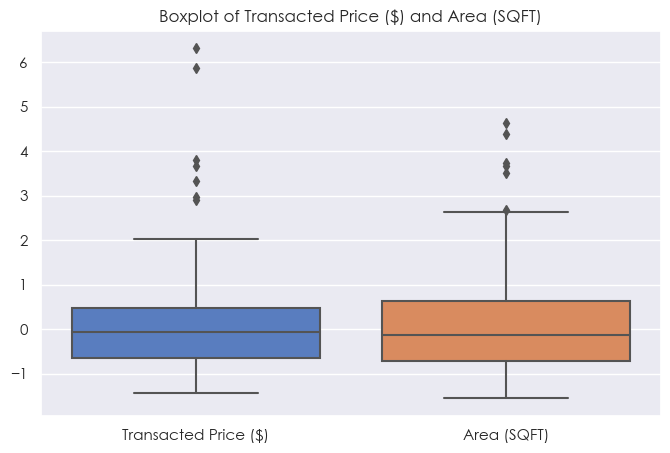

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=feature_scaled,palette=muted,ax=ax).set(title='Boxplot of Transacted Price ($) and Area (SQFT)')
ax.set_xticklabels(["Transacted Price ($)","Area (SQFT)"])
plt.show()

We can see that now the ranges of both features are similar from feature scaling. Now, we can proceed to perform gradient descent.

**GRADIENT DESCENT ALGORITHM**

Initialize variables of X and Y

In [18]:
X, Y = X_scaled,Y_scaled

In [19]:
a = 1 # Starting value of a (y-intercept)
b = 1 # Starting value of b (gradient)
rate = 0.1 # Set learning rate
epsilon = 0.000000000001 # Stop algorithm when absolute difference between 2 consecutive values is less than epsilon
diff = 1 # Difference between 2 consecutive iterations
max_iter = 1000 # Maximum number of iterations
iter = 1 # Iterations counter
n = float(len(price)) # Value of n (Number of data points)
e = lambda a,b: 1/n * (sum((Y - a - (b * X))**2)) # Function E(a,b)
ea = lambda a,b: -2/n * (sum((Y - a - (b * X))))  # Derivative of function E(a,b) with respect to a
eb = lambda a,b: -2/n * (sum(X*(Y - a - (b * X))))  # Derivative of function E(a,b) with respect to b

# Gradient Descent Algorithm
while diff > epsilon and iter < max_iter:
    ea_new = a - rate * ea(a,b)
    eb_new = b - rate * eb(a,b)
    diff = abs(e(ea_new,eb_new) - e(a,b))
    iter = iter + 1
    a,b = ea_new, eb_new
if not iter < max_iter:
    print("Maximum Iterations Reached.")

print("Summary Output:\n" + "Number of iterations is " + str(iter-1) + "\nThe local minimum occurs when a is " + str(a) + " and b is " + str(b) + "\nMinimum Error is " + str(diff))

Summary Output:
Number of iterations is 61
The local minimum occurs when a is 1.2259964331540898e-06 and b is 0.9004111761253796
Minimum Error is 8.54011306117286e-13


### **QUESTION 2C)II)**

**UNSCALE $a$ AND $b$**

In [20]:
a_unscaled = (a * scalery.scale_[0]) - ((b * scalery.scale_[0] * scalerx.mean_[0]) / scalerx.scale_[0]) + scalery.mean_[0]
b_unscaled = b  * (scalery.scale_[0]/scalerx.scale_[0])
print("Value of a: " + str(a_unscaled) + " | Value of b: " + str(b_unscaled))

Value of a: 332009.30222487776 | Value of b: 876.5253815063592


**Equation**: 

$y_i = 332009 + 876.5x_i$

<i> Transacted Price ($) = 332009 + 876.5 Area (SQFT)

### **QUESTION 2D**

The starting value of a and b were initially tested with zero, however it did not converge to reasonable values, hence I set the starting values of a and b to 1. The learning rate was increased from a value close to zero to 0.1, as a higher learning rate would allow for faster change in parameters for faster convergence, requiring less iterations. Meanwhile, the epsilon is lowered significantly closer to 0 in order to minimize the error function as much as possible for convergence to allow the parameters to be as precise as possible, as after scaling the values are more sensitive to change as a small change in scaled values would cause a large difference in unscaled values for a and b due to the large magnitudes in a and b, and thus the epsilon was lowered significantly to 0.000000000001/1e-12, from initial values I tested such as 0.001 or 0.0001.

## <u>**MODEL 3 MLR**

### **QUESTION 3A**

In [21]:
import random
random.seed(14)
random_values = [random.randint(1,307) for x in range(15)]
print("Random Integers Generated: " + str(random_values))
df_price = price.copy()
df_price = df_price.iloc[random_values]
# Predictor w
lease_left = []
tenure_str = df_price['Tenure'].values
for x in range(len(tenure_str)):
    lease_left.append(int(tenure_str[x][:2]) - (2023 - int(tenure_str[x][-4:])))
df_price["Lease Left"] = lease_left
# Export as excel sheet
df_price.to_excel("Part3AData.xlsx")
df_price

Random Integers Generated: [55, 270, 127, 139, 131, 150, 38, 231, 156, 239, 204, 202, 61, 135, 115]


,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level,Lease Left
55,Q BAY RESIDENCES,1115000,882.65,1263,2023-05-01,TAMPINES STREET 86,Resale,Strata,82,13598,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,01 to 05,88
270,ELIAS GREEN,1290000,1528.49,844,2023-02-01,ELIAS GREEN,Resale,Strata,142,9085,-,Condominium,1,99 yrs lease commencing from 1991,18,Outside Central Region,01 to 05,67
127,MELVILLE PARK,875000,968.76,903,2023-04-01,SIMEI STREET 1,Resale,Strata,90,9722,-,Condominium,1,99 yrs lease commencing from 1992,18,Outside Central Region,06 to 10,68
139,THE PALETTE,2080000,1797.59,1157,2023-04-01,PASIR RIS GROVE,Resale,Strata,167,12455,-,Condominium,1,99 yrs lease commencing from 2010,18,Outside Central Region,01 to 05,86
131,NV RESIDENCES,1600000,1453.14,1101,2023-04-01,PASIR RIS GROVE,Resale,Strata,135,11852,-,Condominium,1,99 yrs lease commencing from 2008,18,Outside Central Region,06 to 10,84
150,OASIS @ ELIAS,2380000,2637.18,902,2023-04-01,ELIAS ROAD,Resale,Strata,245,9714,-,Condominium,1,99 yrs lease commencing from 2008,18,Outside Central Region,16 to 20,84
38,DOUBLE BAY RESIDENCES,1680000,1270.15,1323,2023-05-01,SIMEI STREET 4,Resale,Strata,118,14237,-,Condominium,1,99 yrs lease commencing from 2008,18,Outside Central Region,06 to 10,84
231,VUE 8 RESIDENCE,2820000,2691.00,1048,2023-03-01,PASIR RIS HEIGHTS,Resale,Strata,250,11280,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,16 to 20,88
156,Q BAY RESIDENCES,1470000,1119.46,1313,2023-04-01,TAMPINES STREET 86,Resale,Strata,104,14135,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,01 to 05,88
239,RIPPLE BAY,1088888,775.01,1405,2023-02-01,PASIR RIS LINK,Resale,Strata,72,15123,-,Condominium,1,99 yrs lease commencing from 2011,18,Outside Central Region,06 to 10,87


In [22]:
# Grab the 3 columns needed
df_price.loc[:,['Transacted Price ($)','Area (SQFT)','Lease Left']]

,Transacted Price ($),Area (SQFT),Lease Left
55,1115000,882.65,88
270,1290000,1528.49,67
127,875000,968.76,68
139,2080000,1797.59,86
131,1600000,1453.14,84
150,2380000,2637.18,84
38,1680000,1270.15,84
231,2820000,2691.00,88
156,1470000,1119.46,88
239,1088888,775.01,87


### **QUESTION 3B**

**NEW VARIABLES**

In [23]:
X_unscaled = df_price['Area (SQFT)']
Y_unscaled = df_price['Transacted Price ($)']
W_unscaled = df_price['Lease Left']

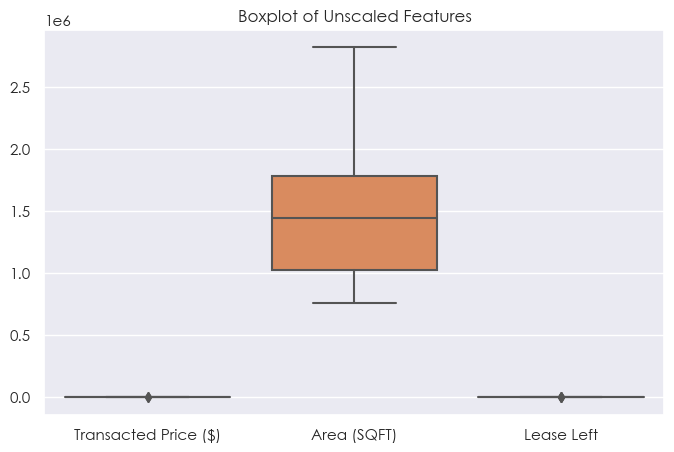

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=[X_unscaled,Y_unscaled,W_unscaled],palette=muted,ax=ax).set(title='Boxplot of Unscaled Features')
ax.set_xticklabels(["Transacted Price ($)","Area (SQFT)","Lease Left"])
plt.show()

We can see that the ranges of values between the three features differ significantly and thus would require feature scaling.

**FEATURE SCALING**

In [25]:
# Instantiate scalers
scalerx = StandardScaler()
scalery = StandardScaler()
scalerw = StandardScaler()
# Scale values
X = scalerx.fit_transform(np.array(X_unscaled).reshape(-1,1))
Y = scalery.fit_transform(np.array(Y_unscaled).reshape(-1,1))
W = scalerw.fit_transform(np.array(W_unscaled).reshape(-1,1))

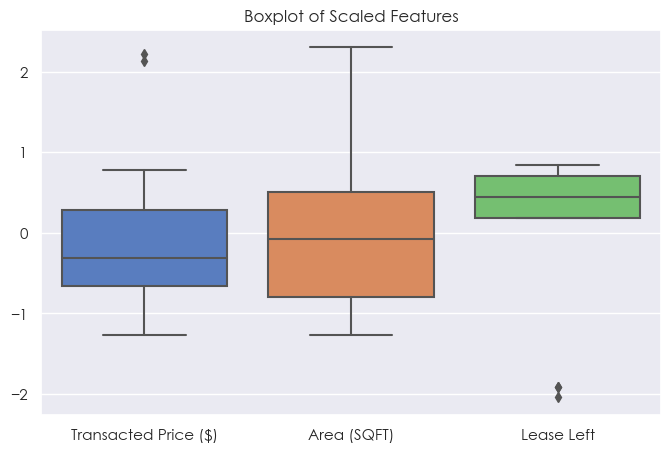

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=[X,Y,W],palette=muted,ax=ax).set(title='Boxplot of Scaled Features')
ax.set_xticklabels(["Transacted Price ($)","Area (SQFT)","Lease Left"])
plt.show()

Now that the features are scaled and fall in the same ranges, they can be applied in the gradient descent algorithm.

**GRADIENT DESCENT ALGORITHM**

In [27]:
a = 1 # Starting value of a (y-intercept)
b = 1 # Starting value of b (gradient)
c = 1 # Starting value of c
rate = 0.1 # Set learning rate
epsilon = 0.00000000000000001 # Stop algorithm when absolute difference between 2 consecutive values is less than epsilon
diff = 1 # Difference between 2 consecutive iterations
max_iter = 1000 # Maximum number of iterations
iter = 1 # Iterations counter
n = float(len(df_price)) # Value of n (Number of data points)
e = lambda a,b,c: 1/n * (sum((Y - a - (b * X) - (c * W))**2)) # Function E(a,b,c)
ea = lambda a,b,c: -2/n * (sum((Y - a - (b * X) - (c * W))))  # Derivative of function E(a,b,c) with respect to a
eb = lambda a,b,c: -2/n * (sum(X*(Y - a - (b * X) - (c * W))))  # Derivative of function E(a,b,c) with respect to b
ec = lambda a,b,c: -2/n * (sum(W*(Y - a - (b * X) - (c * W))))  # Derivative of function E(a,b,c) with respect to c

# Gradient Descent Algorithm
while diff > epsilon and iter < max_iter:
    ea_new = a - rate * ea(a,b,c)
    eb_new = b - rate * eb(a,b,c)
    ec_new = c - rate * ec(a,b,c)
    diff = abs(e(ea_new,eb_new,ec_new) - e(a,b,c))[0]
    iter = iter + 1
    a,b,c = ea_new[0], eb_new[0], ec_new[0]
if not iter < max_iter:
    print("Maximum Iterations Reached.")
    
print("\nSummary Output:\n" + "Number of iterations is " + str(iter-1) + "\nThe local minimum occurs when a is " + str(a) + ", b is " + str(b) + " and c is " + str(c) + "\nMinimum Error is " + str(diff))


Summary Output:
Number of iterations is 89
The local minimum occurs when a is 2.3714216417633633e-09, b is 0.9098674424645822 and c is 0.27084866467564367
Minimum Error is 0.0


**UNSCALE $a$, $b$ AND $c$ VALUES**

In [28]:
a_unscaled = (a * scalery.scale_[0]) - ((b * scalery.scale_[0] * scalerx.mean_[0]) / scalerx.scale_[0]) - ((c * scalery.scale_[0] * scalerw.mean_[0]) / scalerw.scale_[0]) + scalery.mean_[0] 
b_unscaled = (b  * (scalery.scale_[0]/(scalerx.scale_[0])))
c_unscaled = (c  * (scalery.scale_[0]/(scalerw.scale_[0])))

print("Value of a: " + str(a_unscaled) + " | Value of b: " + str(b_unscaled) + " | Value of c: " + str(c_unscaled))

Value of a: -1312981.0483812627 | Value of b: 846.096728969185 | Value of c: 20478.76060313561


**Equation**: 

$y_i = -1312981 + 846.1 x_i + 20479 w_i$

<i> Transacted Price ($) = -1312981 + 846.1 Area (SQFT) + 20479 Lease Left 

**VERIFICATION**

**CALCULATE ERROR**

In [29]:
# Array variables
index_arr = []
original_arr = []
gd_arr = []
err_arr = []
# Loop and store values into arrays
for x in range(len(df_price)):
    row = df_price.iloc[x]
    calc = a_unscaled + b_unscaled * row['Area (SQFT)'] + c_unscaled * row['Lease Left']
    index_arr.append(row.name)
    original_arr.append(row['Transacted Price ($)'])
    gd_arr.append(round(calc))
    err_arr.append(row['Transacted Price ($)'] - round(calc))
compare_dict = {"Index": index_arr, "Original Transacted Price ($)":original_arr, "Gradient Descent Calculated Transacted Price ($)":gd_arr, "Gradient Descent Error": err_arr}
df_compare = pd.DataFrame(compare_dict)
df_compare

,Index,Original Transacted Price ($),Gradient Descent Calculated Transacted Price ($),Gradient Descent Error
0,55,1115000,1235957,-120957
1,270,1290000,1352346,-62346
2,127,875000,899239,-24239
3,139,2080000,1969127,110873
4,131,1600000,1636732,-36732
5,150,2380000,2638544,-258544
6,38,1680000,1481905,198095
7,231,2820000,2765996,54004
8,156,1470000,1436321,33679
9,239,1088888,1124405,-35517


**EVALUATION METRICS**

In [30]:
# Import modules needed
from sklearn import metrics
def predResult(test,predicted):
    # Variables
    pred_test = predicted[-len(test):] # Take last N elements similar to length of test dataset (N)
    mape = metrics.mean_absolute_percentage_error(test,pred_test)
    mae = metrics.mean_absolute_error(test, pred_test)
    mse = metrics.mean_squared_error(test, pred_test)
    rmse = np.sqrt(metrics.mean_squared_error(test, pred_test))
    r_square = metrics.r2_score(test, pred_test)
    mape = metrics.mean_absolute_percentage_error(test, pred_test)
    evar = metrics.explained_variance_score(test, pred_test)
    # Store results in dictionary to convert to dataframe format
    results = {'MAE':[mae],'MAPE':[mape],'MSE':[mse],'RMSE':[rmse],'R-SQUARED':[r_square],'EXPLAINED VARIANCE':[evar]}
    df_results = pd.DataFrame(results)
    return df_results
predResult(test=original_arr, predicted=gd_arr)

,MAE,MAPE,MSE,RMSE,R-SQUARED,EXPLAINED VARIANCE
0,122281.666667,0.089158,2.300321e+10,151668.076346,0.931225,0.931225


From the evaluation metrics, focusing on MAPE and R-squared as they are easier to interpret, we can see that:

- The R-squared shows that 93% of the variance of the data is explained by the variance of the independent variables and predictors x and w.
- The MAPE shows that there was around 8% deviation in values from gradient descent compared to the actual values.
- Overall, this shows us that the gradient descent algorithm performed very well as the linear regression equation formed fits very well to the data.


**RESIDUAL PLOT**

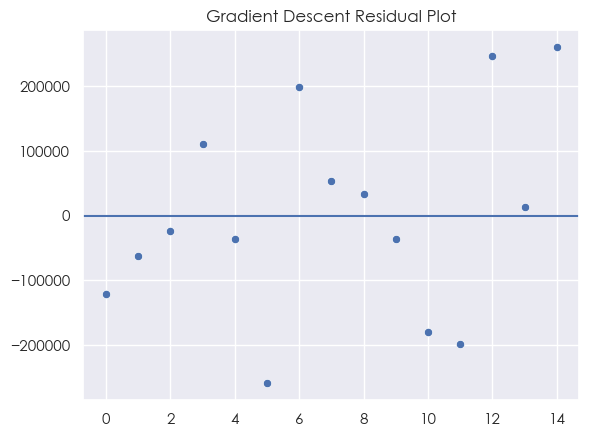

In [31]:
sns.scatterplot(err_arr).set(title='Gradient Descent Residual Plot')
plt.axhline(y=0)
plt.show()

The residual plot shows that even though there are quite a few residuals that deviate far from the zero line, there are also quite a few that are relatively close to the zero line, showing that the linear regression equation formed through the gradient descent algorithm provided a decent fit to the data.

<p style='text-align:center; font-size:30px;'><b> END.